In [2]:
import os
import pickle
from collections import defaultdict, OrderedDict
import numpy as np
import matplotlib.pyplot as mp

In [7]:
basedir = "Experiments/CDPExperiment_Hi_Txf/AssetsLo/logs"
experiment_basedir = "Experiments/CDPExperiment_Lo_Txf/AssetsLo/analysis"

In [8]:
def getvars(path):
    base_path = experiment.split('{')[1][:-1]
    
    s = base_path.split(',')
    
    var_dict = {}
    
    for i in s:
        a,b = i.split(':')
        var_dict[a] = float(b)
        
    return var_dict

In [9]:
inc = 0
dec = 0
concave = 0
convex = 0

mean_usd = defaultdict(dict)
mean_dai = defaultdict(dict)
stddev_usd = defaultdict(dict)
stddev_dai = defaultdict(dict)

def get_type(a,b,c, path):
    global inc, dec, concave, convex, mean_dai, mean_usd, stddev_usd, stddev_dai
    var_dict = getvars(path)
    key = 'other'
    if a < b < c:
        inc += 1
        key = 'increasing'
    elif a > b > c:
        dec += 1
        key = 'decreasing'
    elif a < b > c:
        concave += 1
        key = 'concave'
    elif a > b < c :
        convex += 1
        key = 'convex'
        
    try:
        mean_dai[var_dict['mean_dai']][key] += 1
        mean_usd[var_dict['mean_usd']][key] += 1
        stddev_usd[var_dict['stddev_usd']][key] += 1
        stddev_dai[var_dict['stddev_dai']][key] += 1
    except KeyError:
        mean_dai[var_dict['mean_dai']][key] = 1
        mean_usd[var_dict['mean_usd']][key] = 1
        stddev_usd[var_dict['stddev_usd']][key] = 1
        stddev_dai[var_dict['stddev_dai']][key] = 1    

In [10]:
for experiment in os.listdir(basedir):
    infile = open(basedir + "/" + experiment + "/sim-summary.pickle", 'rb')
    a,b,c,d, _, _ = pickle.load(infile)
    get_type(d[0], d[6],d[-1], experiment)
    infile.close()

In [11]:
print(inc, dec, convex, concave)

0 0 0 0


In [127]:
def print_dict(var_dict, name):
    print(name)
    for i in sorted(var_dict):
        temp = []
        for k in sorted(var_dict[i]):
            temp.append(k + ":" + str(var_dict[i][k]) + " ")
        
        print(i , ",".join(temp))
    print()    

def print_dicts():
    print_dict(mean_usd, "Mean USD")
    print_dict(stddev_usd, "Stddev USD")
    print_dict(mean_dai, "Mean DAI")
    print_dict(stddev_dai, "Stddev DAI")

In [128]:
print_dicts()

Mean USD
100.0 concave:4 ,convex:55 ,decreasing:7 ,increasing:44 ,other:3 
325.0 concave:2 ,convex:65 ,decreasing:29 ,increasing:24 ,other:1 
550.0 concave:3 ,convex:58 ,decreasing:38 ,increasing:21 ,other:1 
775.0 concave:5 ,convex:49 ,decreasing:45 ,increasing:17 ,other:2 
1000.0 concave:8 ,convex:44 ,decreasing:48 ,increasing:19 

Stddev USD
30.0 concave:4 ,convex:63 ,decreasing:32 ,increasing:22 ,other:1 
64.1675 concave:2 ,convex:56 ,decreasing:31 ,increasing:26 
98.335 concave:6 ,convex:56 ,decreasing:31 ,increasing:27 ,other:1 
132.5025 concave:4 ,convex:58 ,decreasing:39 ,increasing:20 ,other:2 
166.67 concave:8 ,convex:42 ,decreasing:38 ,increasing:31 ,other:2 

Mean DAI
100.0 concave:11 ,convex:10 ,decreasing:72 ,increasing:19 ,other:2 
325.0 concave:9 ,convex:39 ,decreasing:30 ,increasing:43 ,other:1 
550.0 convex:69 ,decreasing:22 ,increasing:31 ,other:1 
775.0 concave:1 ,convex:81 ,decreasing:21 ,increasing:20 
1000.0 concave:3 ,convex:74 ,decreasing:24 ,increasing:14 ,oth

### Asset Curve Variance Analysis (Not for multiple runs)

In [13]:
exp_name = "CDP_HiExp"

risk_basedir = "Experiments/" + exp_name + "/analysis/filter:risk"
experiment_basedir = "Experiments/" + exp_name + "/logs"

num_investors = 10

os.mkdir(exp_name)

Investor 0  Less Risky


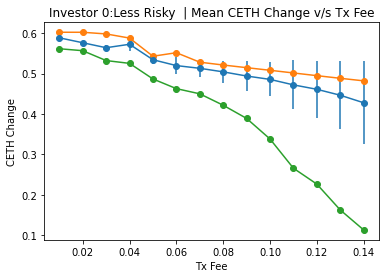

Investor 0  More Risky


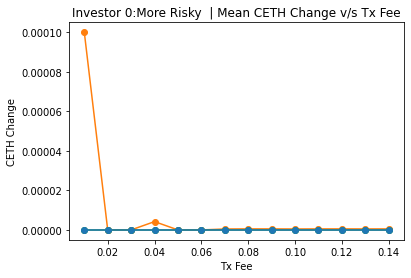

Investor 1  Less Risky


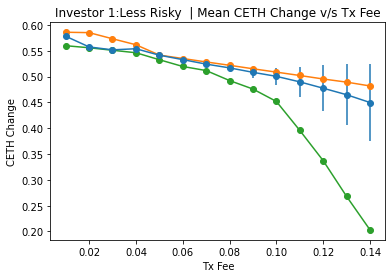

Investor 1  More Risky


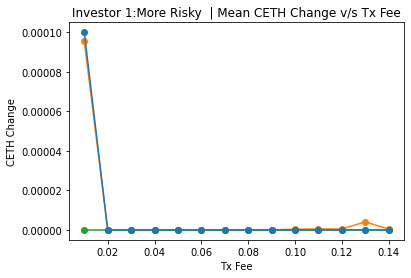

Investor 2  Less Risky


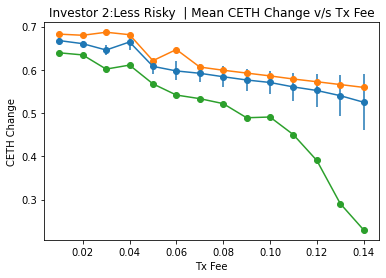

Investor 2  More Risky


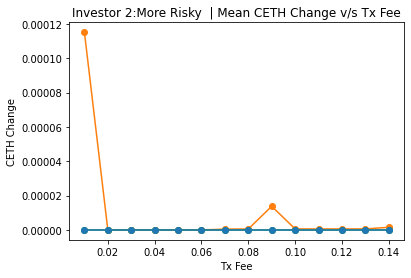

Investor 3  Less Risky


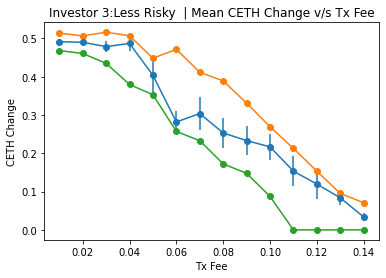

Investor 3  More Risky


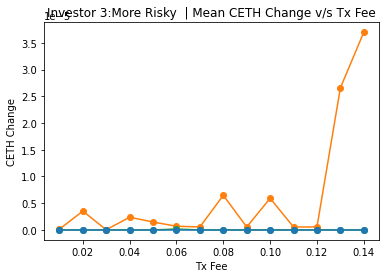

Investor 4  Less Risky


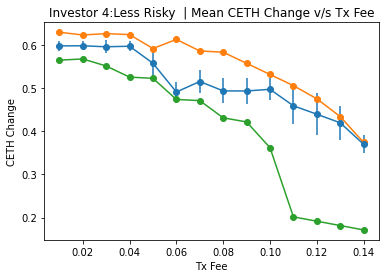

Investor 4  More Risky


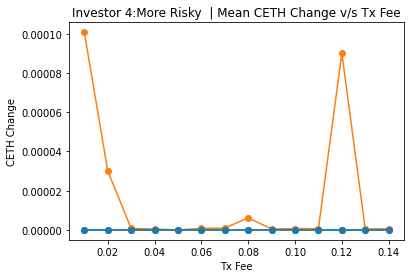

Investor 5  Less Risky


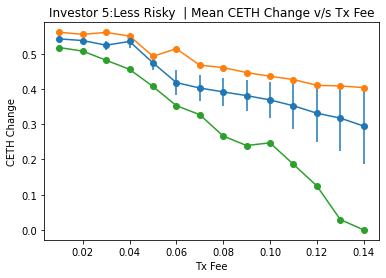

Investor 5  More Risky


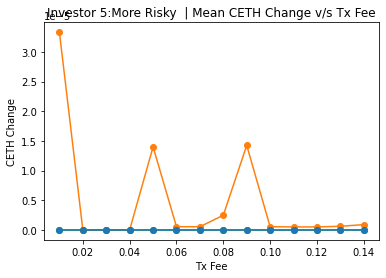

Investor 6  Less Risky


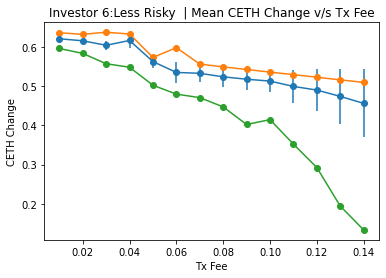

Investor 6  More Risky


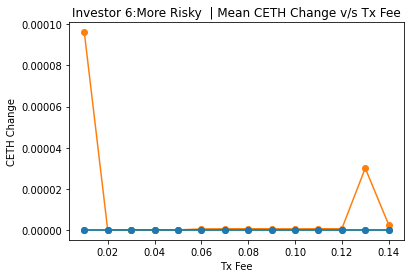

Investor 7  Less Risky


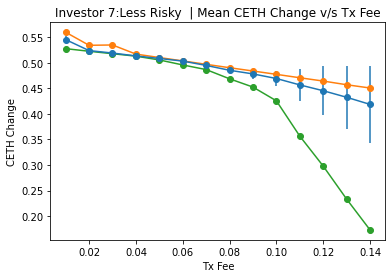

Investor 7  More Risky


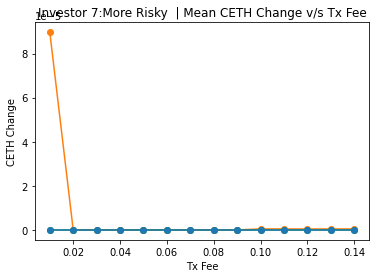

Investor 8  Less Risky


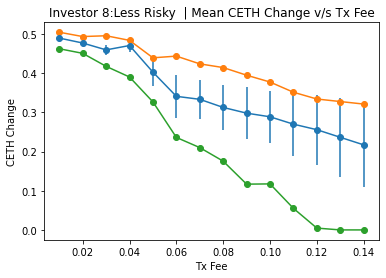

Investor 8  More Risky


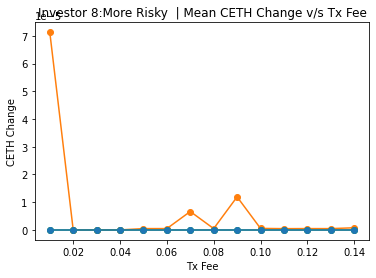

Investor 9  Less Risky


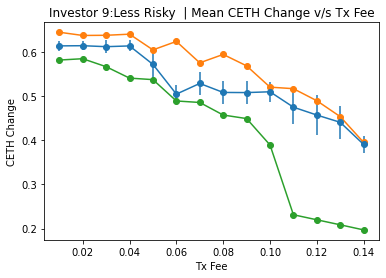

Investor 9  More Risky


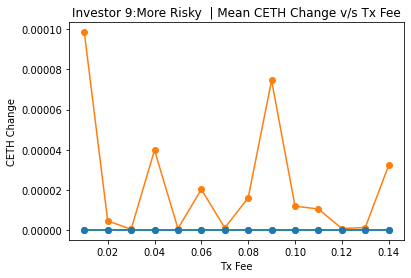

In [16]:
for basedir in sorted(os.listdir(risk_basedir)):
    risk_string = basedir.split('_')[-1]
    
    if "perc" in basedir:
        continue
    
    investor_id = int(basedir[14])
    
    plot_title  = ""
    
    log = False
    
    if risk_string == 'low':
        print("Investor" , investor_id, " More Risky")
        plot_title = "Investor " + str(investor_id) +  ":More Risky"
    else:
        print("Investor" , investor_id, " Less Risky")
        plot_title = "Investor " + str(investor_id) +  ":Less Risky"
       
    result_matrix = defaultdict(list)
    
    for asset_curve_plot_name in os.listdir(os.path.join(risk_basedir, basedir)):
        infile = open(os.path.join(experiment_basedir, asset_curve_plot_name[:-5], "sim-summary.pickle"), 'rb')
                
        # Some data wrangling
        cdp_axis, txf_axis, run_axis, dai_price_history_axis, asset_history_axis, risk_params = pickle.load(infile)
        
        usd = defaultdict(list)
        eth = defaultdict(list)
        dai = defaultdict(list)
        ceth = defaultdict(list)

        cdp_rates = set()

        for cdp, txf, daip, a_h in zip(cdp_axis, txf_axis, dai_price_history_axis, asset_history_axis):
            for i in range(num_investors):
                    if i == investor_id:
                        result_matrix[(cdp, txf, i, risk_string, "usd")].append((a_h[-1][i][0] - a_h[0][i][0], asset_curve_plot_name, daip))
                        result_matrix[(cdp, txf, i, risk_string, "eth")].append((a_h[-1][i][1] - a_h[0][i][1], asset_curve_plot_name, daip))
                        result_matrix[(cdp, txf, i, risk_string, "dai")].append((a_h[-1][i][2] - a_h[0][i][2], asset_curve_plot_name, daip))
                        result_matrix[(cdp, txf, i, risk_string, "ceth")].append((a_h[-1][i][3] - a_h[0][i][3], asset_curve_plot_name, daip))
        
        infile.close()
        
    asset_filter = "ceth"
    plot_var = "Tx Fee"
    plot_vars = set()
    
    # Plot variables for Y
    asset_change_mean_plot = []
    asset_change_stddev_plot = []
    
    maxi_plot = []
    mini_plot = []
   
    dai_price_mean_plot = []
    dai_price_stddev_plot = []
    
    #print("DAI Change Analysis")
    for dict_key in result_matrix:
        value_projection = [i[0] for i in result_matrix[dict_key]]
        experiment_projection = [i[1] for i in result_matrix[dict_key]]
        daip_projection = [i[2] for i in result_matrix[dict_key]]
        
        if plot_var == "Tx Fee":
            plot_vars.add(dict_key[1])
        else:
            plot_vars.add(dict_key[0])
                
        if dict_key[4] == asset_filter:
            asset_mean = round(np.mean(value_projection), 4)
            asset_stddev = round(np.std(value_projection), 4)
            
            asset_change_mean_plot.append(asset_mean)
            asset_change_stddev_plot.append(asset_stddev)
            
            mean_dai_price = round(np.mean(daip_projection), 4)
            stddev_dai_price = round(np.std(daip_projection), 4)
            
            dai_price_mean_plot.append(mean_dai_price)
            dai_price_stddev_plot.append(stddev_dai_price)
            
            if log:
                print("CDP Rate:", dict_key[0], ", Tx Fee:", dict_key[1])
                print("Mean Change:", asset_mean , ", Stddev Change:", asset_stddev)
                print("Mean DAI Price:", mean_dai_price, ", Stddev DAI Price:", stddev_dai_price)
                        
            positive = np.count_nonzero([i >= 0 for i in value_projection])
            negative = np.count_nonzero([i < 0 for i in value_projection])
            
            if log:
                print("Positive:", positive, ", Negative:", negative)
            
            # Print Min and Max
            min_idx = value_projection.index(min(value_projection))
            max_idx = value_projection.index(max(value_projection))
            
            maxi_plot.append(value_projection[max_idx])
            mini_plot.append(value_projection[min_idx])
            
            if log:
                print("Minimum Experiment:" , value_projection[min_idx], ", risk_bitmask:", experiment_projection[min_idx][-16:-6])
                print("Maximum Experiment:", value_projection[max_idx], ", risk_bitmask:", experiment_projection[max_idx][-16:-6])
            
            # Plot DAI Change
#             mp.hist(value_projection, 50)
#             mp.show()
            
            if log:
                print()
    
    # Plot Mean, Min, Max, Stddev DAI Change
    plot_var_list = sorted(list(plot_vars))
    
    mp.errorbar(plot_var_list, asset_change_mean_plot, yerr = asset_change_stddev_plot, marker='o')
    mp.plot(plot_var_list, maxi_plot, marker = 'o')
    mp.plot(plot_var_list, mini_plot, marker = 'o')
    mp.title(plot_title + " " + " | Mean " + asset_filter.upper() + " Change v/s " + plot_var)
    mp.xlabel(plot_var)
    mp.ylabel(asset_filter.upper() + " Change")
    mp.savefig(exp_name + "/" + plot_title + "-Mean " + asset_filter.upper() + "-Change-" + plot_var + ".jpg")
    mp.show()
    
    # Plot Mean, Stddev DAI Price
#     mp.errorbar(plot_var_list, dai_price_mean_plot, yerr = dai_price_stddev_plot, marker='o')
#     mp.xlabel(plot_var)
#     mp.ylabel("DAI Price")
#     mp.title(plot_title + " " + " | Mean DAI Price")
#     mp.savefig("CDP_HiTxf/" + plot_title + "-Mean DAI Price" + ".jpg")
#     mp.show()
    
    if log:
        print()

### Stacked Bar Chart

In [11]:
sim_summary_path = "Experiments/CDPTxfExp/logs/experiment_{mean_usd:1000.0,stddev_usd:166.67,mean_dai:1000.0,stddev_dai:166.67,risk_bitmask:0111100001}/sim-summary.pickle"
num_investors = 10

hi_risk_inv = 0
lo_risk_inv = 1

infile = open(sim_summary_path, 'rb')

cdp_axis, txf_axis, run_axis, dai_price_history_axis, asset_history, risk_params = pickle.load(infile)
data = [cdp_axis, txf_axis, run_axis, dai_price_history_axis, asset_history, risk_params]
infile.close()

#### CDP Time Varying

In [19]:
cdp_set = sorted(list(set(cdp_axis)))

for cdp_rate in cdp_set:
    for packed_data in data[0]:
        if packed_data == cdp_rate:
            print()


[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05

#### Tx Fee Time Varying

In [18]:
txf_set = sorted(list(set(txf_axis)))
txf_set

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14]